#  Data Mining CourseWork 
#### Student: Pranav Gaikwad
#### Student ID: 230276671
#### Programme: MSC AI PROGRAMME

This document describes the analysis of protein epitote data and its classification

We start by loading the dataset and all the required libraries

In [25]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style='whitegrid')

protein_data = pd.read_csv("df_reduced.csv",';')
protein_data.head()

C:\Users\prana\AppData\Local\Temp\ipykernel_11080\3736952790.py:7: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  protein_data = pd.read_csv("df_reduced.csv",';')


,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_nPos,Info_nNeg,Info_cluster,Class,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,XP_815234.1:14,5693,XP_815234.1,283,S,406709,0,1,188,-1,...,0.416813,-0.143011,0.022861,-0.317150,0.231682,0.185963,-0.161442,-0.104047,0.207374,0.247171
1,XP_811525.1:1,5693,XP_811525.1,9,L,339305,0,1,32,-1,...,-0.322140,0.269885,-0.102179,0.325600,-0.145979,-0.010875,0.004623,-0.125649,-0.124625,-0.625465
2,XP_819902.1:4,5693,XP_819902.1,96,G,295341,0,1,64,-1,...,0.267216,-0.120633,-0.012753,-0.533533,-0.077836,-0.115498,-0.234221,-0.578971,-0.195853,0.008974
3,XP_808204.1:14,5693,XP_808204.1,282,Y,315639,0,1,102,-1,...,-0.162871,0.244862,-0.060719,0.237254,-0.015220,0.459895,-0.082559,-0.041386,-0.011011,-0.045873
4,XP_820015.1:10,5693,XP_820015.1,242,A,"244573,390576","0,0","1,1",211,-1,...,0.294608,0.092545,-0.244902,-0.222112,-0.148792,0.061015,0.061460,-0.151051,-0.208596,0.079564


In [26]:
protein_data.describe()

,Info_organism_id,Info_pos,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
count,12402.0,12402.000000,12402.000000,12402.000000,12388.000000,12388.000000,12390.000000,12389.000000,12390.000000,12388.000000,...,12388.000000,12388.000000,12388.000000,12389.000000,12388.000000,12389.000000,12388.000000,12391.000000,12389.000000,12388.000000
mean,5693.0,446.806160,139.667634,-0.970005,0.040924,0.150334,0.068379,0.077347,0.023808,-0.136817,...,0.097165,0.071550,-0.053270,-0.085493,0.031548,0.064117,-0.073711,-0.138898,-0.055978,0.116088
std,0.0,648.570623,77.944928,0.243095,0.194674,0.180886,0.206083,0.183967,0.193493,0.193170,...,0.220632,0.192462,0.195300,0.273192,0.232971,0.205014,0.189592,0.203090,0.191709,0.210566
min,5693.0,1.000000,7.000000,-1.000000,-0.739531,-0.664717,-0.918128,-0.931084,-1.010501,-1.086608,...,-1.035132,-0.987730,-0.898706,-1.284584,-1.076593,-1.045234,-1.043452,-0.982278,-0.860550,-1.059898
25%,5693.0,126.000000,70.000000,-1.000000,-0.084004,0.040529,-0.065351,-0.039926,-0.097352,-0.260591,...,-0.042771,-0.047586,-0.178838,-0.278291,-0.106314,-0.065745,-0.191607,-0.271883,-0.187564,0.008592
50%,5693.0,252.000000,145.000000,-1.000000,0.034410,0.145975,0.069221,0.081350,0.035148,-0.135299,...,0.097722,0.078830,-0.059335,-0.087916,0.048964,0.058741,-0.080203,-0.137899,-0.061822,0.132910
75%,5693.0,456.000000,205.000000,-1.000000,0.160128,0.255262,0.203641,0.201316,0.155194,-0.012340,...,0.243582,0.199581,0.066225,0.101746,0.193762,0.192159,0.037429,-0.007596,0.066036,0.246717
max,5693.0,4839.000000,283.000000,1.000000,0.925082,1.203393,0.974194,1.217404,0.709081,0.838205,...,1.003307,0.966091,0.964062,1.041853,0.842581,1.056373,0.898551,0.708880,0.921726,0.992171


In [27]:
protein_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12402 entries, 0 to 12401
Columns: 300 entries, Info_PepID to feat_esm1b_289
dtypes: float64(290), int64(4), object(6)
memory usage: 28.4+ MB


As discussed in Class only class features and info_clusters is imp rest is not so we can drop them.

In [28]:
columns_to_drop = ["Info_PepID","Info_pos","Info_protein_id","Info_AA","Info_epitope_id","Info_nPos","Info_nNeg","Info_organism_id"]
protein_data = protein_data.drop(columns=columns_to_drop)

protein_data.head()

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,188,-1,-0.050457,0.350820,0.081111,0.292722,-0.046843,-0.316361,0.205464,-0.164362,...,0.416813,-0.143011,0.022861,-0.317150,0.231682,0.185963,-0.161442,-0.104047,0.207374,0.247171
1,32,-1,0.200686,-0.200323,-0.367348,-0.286893,-0.289697,-0.061222,-0.441129,0.103984,...,-0.322140,0.269885,-0.102179,0.325600,-0.145979,-0.010875,0.004623,-0.125649,-0.124625,-0.625465
2,64,-1,0.089208,0.074643,0.005332,0.304287,-0.093382,-0.150377,-0.202398,-0.302996,...,0.267216,-0.120633,-0.012753,-0.533533,-0.077836,-0.115498,-0.234221,-0.578971,-0.195853,0.008974
3,102,-1,0.150502,0.247198,0.155206,0.029653,0.117658,-0.185720,-0.206774,0.056524,...,-0.162871,0.244862,-0.060719,0.237254,-0.015220,0.459895,-0.082559,-0.041386,-0.011011,-0.045873
4,211,-1,0.247700,-0.045094,-0.017004,-0.282002,-0.001418,-0.162899,-0.159904,-0.414519,...,0.294608,0.092545,-0.244902,-0.222112,-0.148792,0.061015,0.061460,-0.151051,-0.208596,0.079564


In [29]:
protein_data.head()

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,188,-1,-0.050457,0.350820,0.081111,0.292722,-0.046843,-0.316361,0.205464,-0.164362,...,0.416813,-0.143011,0.022861,-0.317150,0.231682,0.185963,-0.161442,-0.104047,0.207374,0.247171
1,32,-1,0.200686,-0.200323,-0.367348,-0.286893,-0.289697,-0.061222,-0.441129,0.103984,...,-0.322140,0.269885,-0.102179,0.325600,-0.145979,-0.010875,0.004623,-0.125649,-0.124625,-0.625465
2,64,-1,0.089208,0.074643,0.005332,0.304287,-0.093382,-0.150377,-0.202398,-0.302996,...,0.267216,-0.120633,-0.012753,-0.533533,-0.077836,-0.115498,-0.234221,-0.578971,-0.195853,0.008974
3,102,-1,0.150502,0.247198,0.155206,0.029653,0.117658,-0.185720,-0.206774,0.056524,...,-0.162871,0.244862,-0.060719,0.237254,-0.015220,0.459895,-0.082559,-0.041386,-0.011011,-0.045873
4,211,-1,0.247700,-0.045094,-0.017004,-0.282002,-0.001418,-0.162899,-0.159904,-0.414519,...,0.294608,0.092545,-0.244902,-0.222112,-0.148792,0.061015,0.061460,-0.151051,-0.208596,0.079564


In [30]:
summary = protein_data.describe()
summary

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
count,12402.000000,12402.000000,12388.000000,12388.000000,12390.000000,12389.000000,12390.000000,12388.000000,12388.000000,12390.000000,...,12388.000000,12388.000000,12388.000000,12389.000000,12388.000000,12389.000000,12388.000000,12391.000000,12389.000000,12388.000000
mean,139.667634,-0.970005,0.040924,0.150334,0.068379,0.077347,0.023808,-0.136817,-0.094994,-0.008023,...,0.097165,0.071550,-0.053270,-0.085493,0.031548,0.064117,-0.073711,-0.138898,-0.055978,0.116088
std,77.944928,0.243095,0.194674,0.180886,0.206083,0.183967,0.193493,0.193170,0.219265,0.240700,...,0.220632,0.192462,0.195300,0.273192,0.232971,0.205014,0.189592,0.203090,0.191709,0.210566
min,7.000000,-1.000000,-0.739531,-0.664717,-0.918128,-0.931084,-1.010501,-1.086608,-1.499195,-0.957883,...,-1.035132,-0.987730,-0.898706,-1.284584,-1.076593,-1.045234,-1.043452,-0.982278,-0.860550,-1.059898
25%,70.000000,-1.000000,-0.084004,0.040529,-0.065351,-0.039926,-0.097352,-0.260591,-0.207169,-0.180765,...,-0.042771,-0.047586,-0.178838,-0.278291,-0.106314,-0.065745,-0.191607,-0.271883,-0.187564,0.008592
50%,145.000000,-1.000000,0.034410,0.145975,0.069221,0.081350,0.035148,-0.135299,-0.071583,-0.034287,...,0.097722,0.078830,-0.059335,-0.087916,0.048964,0.058741,-0.080203,-0.137899,-0.061822,0.132910
75%,205.000000,-1.000000,0.160128,0.255262,0.203641,0.201316,0.155194,-0.012340,0.051047,0.152728,...,0.243582,0.199581,0.066225,0.101746,0.193762,0.192159,0.037429,-0.007596,0.066036,0.246717
max,283.000000,1.000000,0.925082,1.203393,0.974194,1.217404,0.709081,0.838205,0.582508,1.275659,...,1.003307,0.966091,0.964062,1.041853,0.842581,1.056373,0.898551,0.708880,0.921726,0.992171


#### Check Class Imbalance 


In [31]:
class_distribution = protein_data['Class'].value_counts()
class_distribution

-1    12216
 1      186
Name: Class, dtype: int64

As we can see the Target Class has negative values 12216 which quite more as compared to positive values 186 which might affect the model while training,we can use sampling technique to overcome that later in the data preprocessing process.

### Splitting the data and maintaining class imbalance

We can split the data according to the values of Info_Cluster Column whilist maintaining the class balance 

In [32]:
from sklearn.model_selection import GroupShuffleSplit


gss = GroupShuffleSplit(n_splits=1, test_size=0.25, random_state=46)


for train_idx, test_idx in gss.split(protein_data, groups=protein_data['Info_cluster']):
    train_protein_data = protein_data.iloc[train_idx]
    test_protein_data = protein_data.iloc[test_idx]


train_class_balance = train_protein_data['Class'].value_counts(normalize=True)
test_class_balance = test_protein_data['Class'].value_counts(normalize=True)

print("Training set class balance:\n", train_class_balance)
print("\nTest set class balance:\n", test_class_balance)


Training set class balance:
 -1    0.984514
 1    0.015486
Name: Class, dtype: float64

Test set class balance:
 -1    0.986351
 1    0.013649
Name: Class, dtype: float64


After trying Multiple Random state combinations and test size we got this the best class balance that is similar to test as well as train 

In [33]:
train_protein_feature = train_protein_data.drop(['Info_cluster'],axis=1) # we create a seperate data frame with just features and Class

#### Scale Checking


We can check the scale of all the features.

In [34]:
max_values = train_protein_feature.max(numeric_only=True)
min_values = train_protein_feature.min(numeric_only=True)

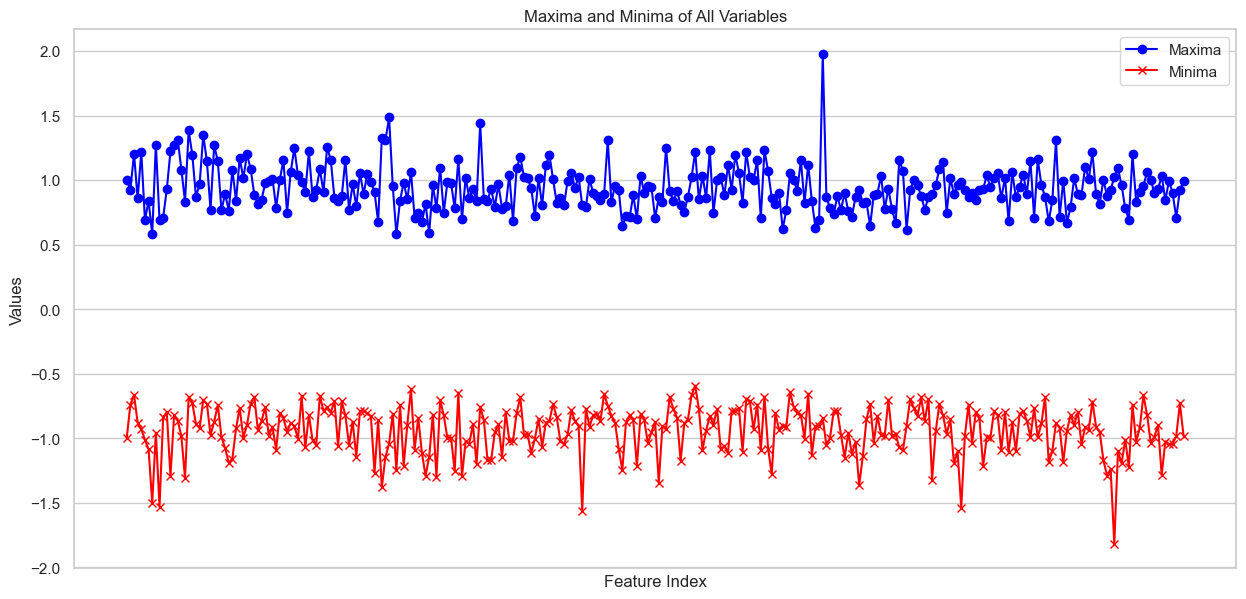

In [35]:
plt.figure(figsize=(15, 7))

# Plotting maxima and minima as line charts
plt.plot(max_values.index, max_values.values, label='Maxima', color='blue', marker='o')
plt.plot(min_values.index, min_values.values, label='Minima', color='red', marker='x')

plt.xticks([])  # Hiding x-axis labels due to high number of features making it cluttered
plt.xlabel('Feature Index')
plt.ylabel('Values')
plt.title('Maxima and Minima of All Variables')
plt.legend()
plt.grid(True)

plt.show()

From the graph we notice few notable outliers, particularly one maximum value that is much higher than the rest and one minimum value that is much lower than the rest. These extreme values might indicate that the corresponding features have a wider range or are more volatile.

In [36]:
feature_index_of_max = max_values.idxmax()# to gauge which feature it might be
feature_index_of_max

'feat_esm1b_190'

In [37]:
feature_index_of_min = min_values.idxmin()# to gauge which feature it might be
feature_index_of_min

'feat_esm1b_270'

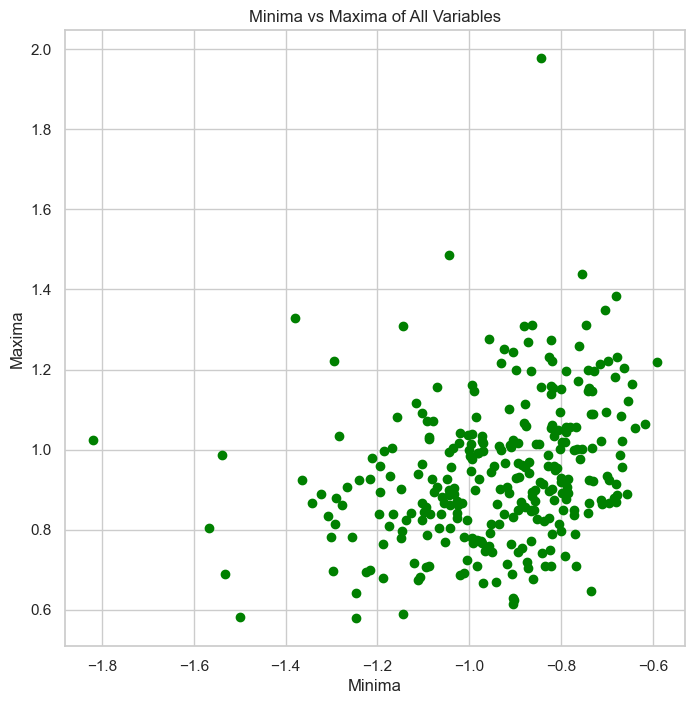

In [38]:
# Alternatively, plotting minima against maxima
plt.figure(figsize=(8, 8))
plt.scatter(min_values.values, max_values.values, color='green')
plt.xlabel('Minima')
plt.ylabel('Maxima')
plt.title('Minima vs Maxima of All Variables')
plt.grid(True)

plt.show()

From this graph we can infer that there are two distinct outliers. One in the bottom left, which indicates a variable with both a very low minimum and a very low maximum. Another outlier is located near the top of the y-axis, indicating a variable with a small or moderate minimum but a very high maximum.

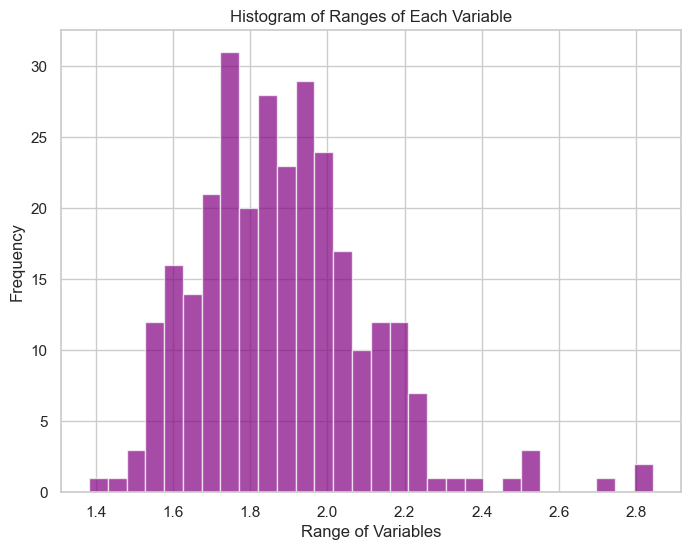

In [39]:
# Calculate the range of each variable
ranges = max_values - min_values

# Plotting a histogram of the ranges
plt.figure(figsize=(8, 6))
plt.hist(ranges, bins=30, color='purple', alpha=0.7)
plt.xlabel('Range of Variables')
plt.ylabel('Frequency')
plt.title('Histogram of Ranges of Each Variable')
plt.grid(True)

plt.show()


After seeing this graph we need to normalize the data or scale the data using min-max scaler or standard scaler

### Outliers and Missing Values

In this section we need to identify all the outliers and missing values and treat them.

In [40]:
train_protein_data.head()

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,188,-1,-0.050457,0.350820,0.081111,0.292722,-0.046843,-0.316361,0.205464,-0.164362,...,0.416813,-0.143011,0.022861,-0.317150,0.231682,0.185963,-0.161442,-0.104047,0.207374,0.247171
1,32,-1,0.200686,-0.200323,-0.367348,-0.286893,-0.289697,-0.061222,-0.441129,0.103984,...,-0.322140,0.269885,-0.102179,0.325600,-0.145979,-0.010875,0.004623,-0.125649,-0.124625,-0.625465
2,64,-1,0.089208,0.074643,0.005332,0.304287,-0.093382,-0.150377,-0.202398,-0.302996,...,0.267216,-0.120633,-0.012753,-0.533533,-0.077836,-0.115498,-0.234221,-0.578971,-0.195853,0.008974
3,102,-1,0.150502,0.247198,0.155206,0.029653,0.117658,-0.185720,-0.206774,0.056524,...,-0.162871,0.244862,-0.060719,0.237254,-0.015220,0.459895,-0.082559,-0.041386,-0.011011,-0.045873
4,211,-1,0.247700,-0.045094,-0.017004,-0.282002,-0.001418,-0.162899,-0.159904,-0.414519,...,0.294608,0.092545,-0.244902,-0.222112,-0.148792,0.061015,0.061460,-0.151051,-0.208596,0.079564


Check For missing Values

In [41]:

missing_values_per_feature = train_protein_data.isnull().sum()
missing_percentage_per_feature = (train_protein_data.isnull().mean() * 100).sort_values(ascending=False)
rows_with_missing_values = train_protein_data[train_protein_data.isnull().any(axis=1)]
total_missing_values = train_protein_data.isnull().sum().sum()
percentage_missing_total = (total_missing_values / (train_protein_data.shape[0] * train_protein_data.shape[1])) * 100
missing_values_per_feature, missing_percentage_per_feature, rows_with_missing_values.head(), total_missing_values, percentage_missing_total

(Info_cluster       0
 Class              0
 feat_esm1b_0      11
 feat_esm1b_1      11
 feat_esm1b_2      10
                   ..
 feat_esm1b_285    11
 feat_esm1b_286    11
 feat_esm1b_287     9
 feat_esm1b_288    11
 feat_esm1b_289    11
 Length: 292, dtype: int64,
 feat_esm1b_148    90.104338
 feat_esm1b_289     0.120813
 feat_esm1b_120     0.120813
 feat_esm1b_112     0.120813
 feat_esm1b_220     0.120813
                     ...    
 feat_esm1b_267     0.087864
 feat_esm1b_270     0.076881
 feat_esm1b_119     0.065898
 Class              0.000000
 Info_cluster       0.000000
 Length: 292, dtype: float64,
    Info_cluster  Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  \
 0           188     -1     -0.050457      0.350820      0.081111   
 1            32     -1      0.200686     -0.200323     -0.367348   
 2            64     -1      0.089208      0.074643      0.005332   
 3           102     -1      0.150502      0.247198      0.155206   
 4           211     -1      0.24770

As we can see most of the features are not missing significant percent of values except feature 148 - it is missing 90% of values we can directly drop it in preprocessing and as for others we can replace it by median and for categorical by mode.

In [42]:
train_protein_data.drop('feat_esm1b_148',axis=1)

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,188,-1,-0.050457,0.350820,0.081111,0.292722,-0.046843,-0.316361,0.205464,-0.164362,...,0.416813,-0.143011,0.022861,-0.317150,0.231682,0.185963,-0.161442,-0.104047,0.207374,0.247171
1,32,-1,0.200686,-0.200323,-0.367348,-0.286893,-0.289697,-0.061222,-0.441129,0.103984,...,-0.322140,0.269885,-0.102179,0.325600,-0.145979,-0.010875,0.004623,-0.125649,-0.124625,-0.625465
2,64,-1,0.089208,0.074643,0.005332,0.304287,-0.093382,-0.150377,-0.202398,-0.302996,...,0.267216,-0.120633,-0.012753,-0.533533,-0.077836,-0.115498,-0.234221,-0.578971,-0.195853,0.008974
3,102,-1,0.150502,0.247198,0.155206,0.029653,0.117658,-0.185720,-0.206774,0.056524,...,-0.162871,0.244862,-0.060719,0.237254,-0.015220,0.459895,-0.082559,-0.041386,-0.011011,-0.045873
4,211,-1,0.247700,-0.045094,-0.017004,-0.282002,-0.001418,-0.162899,-0.159904,-0.414519,...,0.294608,0.092545,-0.244902,-0.222112,-0.148792,0.061015,0.061460,-0.151051,-0.208596,0.079564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,57,-1,0.038908,0.039562,-0.011788,-0.119761,-0.137750,0.058084,0.065877,0.115975,...,-0.012748,0.277135,-0.097733,0.180318,0.077433,0.330096,-0.217708,-0.192381,-0.200941,0.321670
12396,14,-1,-0.053330,0.220858,0.119005,0.349750,0.058169,-0.018591,-0.009175,-0.171758,...,0.596337,0.227789,-0.066475,-0.332706,0.072423,-0.095534,-0.039109,-0.457115,0.040521,0.207001
12397,46,-1,0.245804,0.466037,0.321277,-0.055060,0.201123,-0.222481,-0.182648,0.022854,...,0.010504,0.231793,-0.049883,0.260013,0.066875,-0.362300,-0.468976,0.135828,-0.016245,0.365967
12398,36,-1,0.006633,0.024325,0.021564,0.114774,0.075034,-0.408322,-0.144037,-0.176111,...,0.378880,0.233636,-0.018080,-0.402595,0.277612,-0.098770,-0.243120,-0.286025,-0.277661,-0.145548


In [43]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')


train_protein_data_imputed = train_protein_data.copy()
features_to_impute = train_protein_data.columns.drop(['Info_cluster', 'Class'])
train_protein_data_imputed[features_to_impute] = median_imputer.fit_transform(train_protein_data_imputed[features_to_impute])




In [44]:
train_protein_data_imputed

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,188,-1,-0.050457,0.350820,0.081111,0.292722,-0.046843,-0.316361,0.205464,-0.164362,...,0.416813,-0.143011,0.022861,-0.317150,0.231682,0.185963,-0.161442,-0.104047,0.207374,0.247171
1,32,-1,0.200686,-0.200323,-0.367348,-0.286893,-0.289697,-0.061222,-0.441129,0.103984,...,-0.322140,0.269885,-0.102179,0.325600,-0.145979,-0.010875,0.004623,-0.125649,-0.124625,-0.625465
2,64,-1,0.089208,0.074643,0.005332,0.304287,-0.093382,-0.150377,-0.202398,-0.302996,...,0.267216,-0.120633,-0.012753,-0.533533,-0.077836,-0.115498,-0.234221,-0.578971,-0.195853,0.008974
3,102,-1,0.150502,0.247198,0.155206,0.029653,0.117658,-0.185720,-0.206774,0.056524,...,-0.162871,0.244862,-0.060719,0.237254,-0.015220,0.459895,-0.082559,-0.041386,-0.011011,-0.045873
4,211,-1,0.247700,-0.045094,-0.017004,-0.282002,-0.001418,-0.162899,-0.159904,-0.414519,...,0.294608,0.092545,-0.244902,-0.222112,-0.148792,0.061015,0.061460,-0.151051,-0.208596,0.079564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,57,-1,0.038908,0.039562,-0.011788,-0.119761,-0.137750,0.058084,0.065877,0.115975,...,-0.012748,0.277135,-0.097733,0.180318,0.077433,0.330096,-0.217708,-0.192381,-0.200941,0.321670
12396,14,-1,-0.053330,0.220858,0.119005,0.349750,0.058169,-0.018591,-0.009175,-0.171758,...,0.596337,0.227789,-0.066475,-0.332706,0.072423,-0.095534,-0.039109,-0.457115,0.040521,0.207001
12397,46,-1,0.245804,0.466037,0.321277,-0.055060,0.201123,-0.222481,-0.182648,0.022854,...,0.010504,0.231793,-0.049883,0.260013,0.066875,-0.362300,-0.468976,0.135828,-0.016245,0.365967
12398,36,-1,0.006633,0.024325,0.021564,0.114774,0.075034,-0.408322,-0.144037,-0.176111,...,0.378880,0.233636,-0.018080,-0.402595,0.277612,-0.098770,-0.243120,-0.286025,-0.277661,-0.145548


Now that we have imputed the data of null values lets check if there are any null values

In [45]:

missing_values_per_feature = train_protein_data_imputed.isnull().sum()
missing_percentage_per_feature = (train_protein_data_imputed.isnull().mean() * 100).sort_values(ascending=False)
rows_with_missing_values = train_protein_data_imputed[train_protein_data_imputed.isnull().any(axis=1)]
total_missing_values = train_protein_data_imputed.isnull().sum().sum()
percentage_missing_total = (total_missing_values / (train_protein_data_imputed.shape[0] * train_protein_data_imputed.shape[1])) * 100
missing_values_per_feature, missing_percentage_per_feature, rows_with_missing_values.head(), total_missing_values, percentage_missing_total

(Info_cluster      0
 Class             0
 feat_esm1b_0      0
 feat_esm1b_1      0
 feat_esm1b_2      0
                  ..
 feat_esm1b_285    0
 feat_esm1b_286    0
 feat_esm1b_287    0
 feat_esm1b_288    0
 feat_esm1b_289    0
 Length: 292, dtype: int64,
 Info_cluster      0.0
 feat_esm1b_181    0.0
 feat_esm1b_197    0.0
 feat_esm1b_196    0.0
 feat_esm1b_195    0.0
                  ... 
 feat_esm1b_94     0.0
 feat_esm1b_93     0.0
 feat_esm1b_92     0.0
 feat_esm1b_91     0.0
 feat_esm1b_289    0.0
 Length: 292, dtype: float64,
 Empty DataFrame
 Columns: [Info_cluster, Class, feat_esm1b_0, feat_esm1b_1, feat_esm1b_2, feat_esm1b_3, feat_esm1b_4, feat_esm1b_5, feat_esm1b_6, feat_esm1b_7, feat_esm1b_8, feat_esm1b_9, feat_esm1b_10, feat_esm1b_11, feat_esm1b_12, feat_esm1b_13, feat_esm1b_14, feat_esm1b_15, feat_esm1b_16, feat_esm1b_17, feat_esm1b_18, feat_esm1b_19, feat_esm1b_20, feat_esm1b_21, feat_esm1b_22, feat_esm1b_23, feat_esm1b_24, feat_esm1b_25, feat_esm1b_26, feat_esm1b_27,

As we can see we have removed all the null values and replaced them with median

### Outliers Treatment

In this section we use ECOD method to identify outliers and try to treat them using various methods

In [46]:
from pyod.models.ecod import ECOD
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

outlier_data = train_protein_data_imputed.drop(['Info_cluster','Class'],axis=1) # We only need the features
scaler = StandardScaler() # Scale the data
X_scaled = scaler.fit_transform(outlier_data)



In [47]:

ecod = ECOD()

ecod.fit(X_scaled)

ECOD(contamination=0.1, n_jobs=1)

In [48]:
outlier_scores = ecod.decision_function(X_scaled)

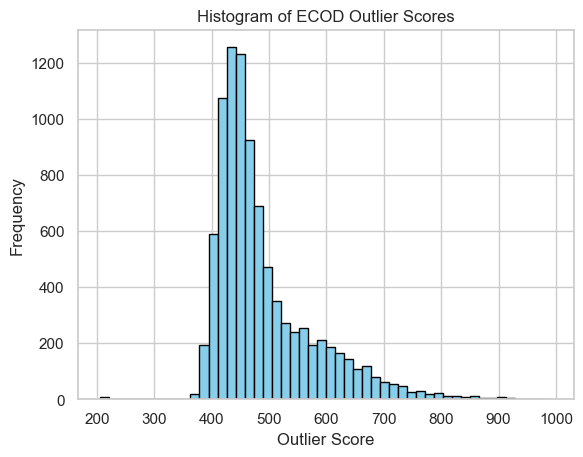

In [49]:
plt.hist(outlier_scores, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of ECOD Outlier Scores')
plt.xlabel('Outlier Score')
plt.ylabel('Frequency')
plt.show()

We can see that the majority of data points have outlier scores clustered in a range, with a tail extending towards higher scores. This is evident from the shape of the histogram.
Data points with very high outlier scores, which lie on the right side of the histogram and are distant from the main cluster, are likely to be outliers. So we winsorize them to 10% i.e  cap the extreme values (High outlier score) at a 95% percentile. NOTE- winsorization process doesn't remove the outliers; instead, it replaces the extreme values with the nearest values at the specified percentile thresholds

In [50]:
from scipy.stats.mstats import winsorize

feature_columns = train_protein_data_imputed.columns.difference(['Class','Info_cluster'])
feature_columns


Index(['feat_esm1b_0', 'feat_esm1b_1', 'feat_esm1b_10', 'feat_esm1b_100',
       'feat_esm1b_101', 'feat_esm1b_102', 'feat_esm1b_103', 'feat_esm1b_104',
       'feat_esm1b_105', 'feat_esm1b_106',
       ...
       'feat_esm1b_90', 'feat_esm1b_91', 'feat_esm1b_92', 'feat_esm1b_93',
       'feat_esm1b_94', 'feat_esm1b_95', 'feat_esm1b_96', 'feat_esm1b_97',
       'feat_esm1b_98', 'feat_esm1b_99'],
      dtype='object', length=290)

In [51]:
for column in feature_columns:
    train_protein_data_imputed[column] = winsorize(train_protein_data_imputed[column], limits=[0.1, 0.1])

After treating the outlier we check if there are any outliers still

In [52]:
outlier_data = train_protein_data_imputed.drop(['Info_cluster','Class'],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(outlier_data)

In [53]:
ecod = ECOD()

ecod.fit(X_scaled)

c:\Users\prana\anaconda3\Lib\site-packages\pyod\models\ecod.py:25: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return np.nan_to_num(skew_sp(X, axis=axis))


ECOD(contamination=0.1, n_jobs=1)

In [54]:
outlier_scores = ecod.decision_function(X_scaled)

c:\Users\prana\anaconda3\Lib\site-packages\pyod\models\ecod.py:25: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return np.nan_to_num(skew_sp(X, axis=axis))


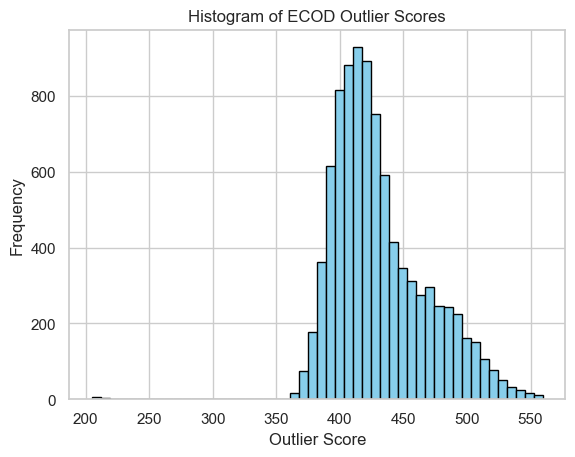

In [55]:
plt.hist(outlier_scores, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of ECOD Outlier Scores')
plt.xlabel('Outlier Score')
plt.ylabel('Frequency')
plt.show()

We have successfully treated the outlier data by winisorising the data frame as you can see the highest outlier score is around 550 which is acceptable. After treating the outliers we can use Min-Max Scaler to Normalize the all features except Info_Cluster and Class (Target Variable)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_columns = [col for col in train_protein_data_imputed.columns if col not in ['Class', 'Info_cluster']]
train_protein_data_imputed[feature_columns] = scaler.fit_transform(train_protein_data_imputed[feature_columns])

In [57]:
train_protein_data_imputed

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,188,-1,0.299482,0.950953,0.517801,0.994041,0.364805,0.118113,1.000000,0.209024,...,1.000000,0.059441,0.665795,0.159952,0.869542,0.731923,0.301052,0.573259,1.000000,0.778258
1,32,-1,0.815020,0.000000,0.000000,0.000000,0.000000,0.652678,0.000000,0.651591,...,0.000000,0.939367,0.402050,1.000000,0.211624,0.340658,0.660752,0.530785,0.341021,0.000000
2,64,-1,0.586181,0.310429,0.371101,1.000000,0.266260,0.465882,0.287675,0.000000,...,0.813127,0.107132,0.590675,0.000000,0.330336,0.132692,0.143413,0.000000,0.191029,0.286466
3,102,-1,0.712004,0.710628,0.661240,0.413101,0.713134,0.391830,0.278853,0.573317,...,0.018154,0.886040,0.489502,0.953790,0.439419,1.000000,0.471915,0.696461,0.580272,0.173226
4,211,-1,0.911529,0.032728,0.327860,0.000000,0.460993,0.439646,0.373363,0.000000,...,0.863758,0.561436,0.101007,0.296035,0.206724,0.483556,0.783863,0.480841,0.164195,0.432209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,57,-1,0.482926,0.229068,0.337958,0.083146,0.172312,0.902646,0.828639,0.671366,...,0.295642,0.954817,0.411429,0.872264,0.600827,1.000000,0.179180,0.399579,0.180316,0.932072
12396,14,-1,0.293583,0.649539,0.591158,1.000000,0.587168,0.741998,0.677301,0.196827,...,1.000000,0.849654,0.477361,0.137679,0.592100,0.172375,0.566029,0.000000,0.688788,0.695322
12397,46,-1,0.907636,1.000000,0.982737,0.226026,0.889870,0.314810,0.327501,0.517788,...,0.338620,0.858187,0.512358,0.986377,0.582434,0.000000,0.000000,1.000000,0.569250,1.000000
12398,36,-1,0.416674,0.193728,0.402524,0.601074,0.622878,0.000000,0.405359,0.189647,...,1.000000,0.862115,0.579439,0.037606,0.949558,0.165943,0.124138,0.215456,0.018758,0.000000


### Feature Selection

For simplicity we are gonna divide dataset into features and target and perform some basic Feature Selection technique like Variance Threshold

In [58]:
train_target_variable = train_protein_data_imputed['Class']
train_feature_variable = train_protein_data_imputed.drop(['Info_cluster','Class'],axis=1)


In [59]:
train_protein_data_imputed

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,188,-1,0.299482,0.950953,0.517801,0.994041,0.364805,0.118113,1.000000,0.209024,...,1.000000,0.059441,0.665795,0.159952,0.869542,0.731923,0.301052,0.573259,1.000000,0.778258
1,32,-1,0.815020,0.000000,0.000000,0.000000,0.000000,0.652678,0.000000,0.651591,...,0.000000,0.939367,0.402050,1.000000,0.211624,0.340658,0.660752,0.530785,0.341021,0.000000
2,64,-1,0.586181,0.310429,0.371101,1.000000,0.266260,0.465882,0.287675,0.000000,...,0.813127,0.107132,0.590675,0.000000,0.330336,0.132692,0.143413,0.000000,0.191029,0.286466
3,102,-1,0.712004,0.710628,0.661240,0.413101,0.713134,0.391830,0.278853,0.573317,...,0.018154,0.886040,0.489502,0.953790,0.439419,1.000000,0.471915,0.696461,0.580272,0.173226
4,211,-1,0.911529,0.032728,0.327860,0.000000,0.460993,0.439646,0.373363,0.000000,...,0.863758,0.561436,0.101007,0.296035,0.206724,0.483556,0.783863,0.480841,0.164195,0.432209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,57,-1,0.482926,0.229068,0.337958,0.083146,0.172312,0.902646,0.828639,0.671366,...,0.295642,0.954817,0.411429,0.872264,0.600827,1.000000,0.179180,0.399579,0.180316,0.932072
12396,14,-1,0.293583,0.649539,0.591158,1.000000,0.587168,0.741998,0.677301,0.196827,...,1.000000,0.849654,0.477361,0.137679,0.592100,0.172375,0.566029,0.000000,0.688788,0.695322
12397,46,-1,0.907636,1.000000,0.982737,0.226026,0.889870,0.314810,0.327501,0.517788,...,0.338620,0.858187,0.512358,0.986377,0.582434,0.000000,0.000000,1.000000,0.569250,1.000000
12398,36,-1,0.416674,0.193728,0.402524,0.601074,0.622878,0.000000,0.405359,0.189647,...,1.000000,0.862115,0.579439,0.037606,0.949558,0.165943,0.124138,0.215456,0.018758,0.000000


#### Variance Threshold

In [60]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif

selector = VarianceThreshold(threshold=0.01)
number_of_features = train_feature_variable.shape[1]
protein_data_var_thresh = selector.fit_transform(train_feature_variable)
variances = selector.variances_

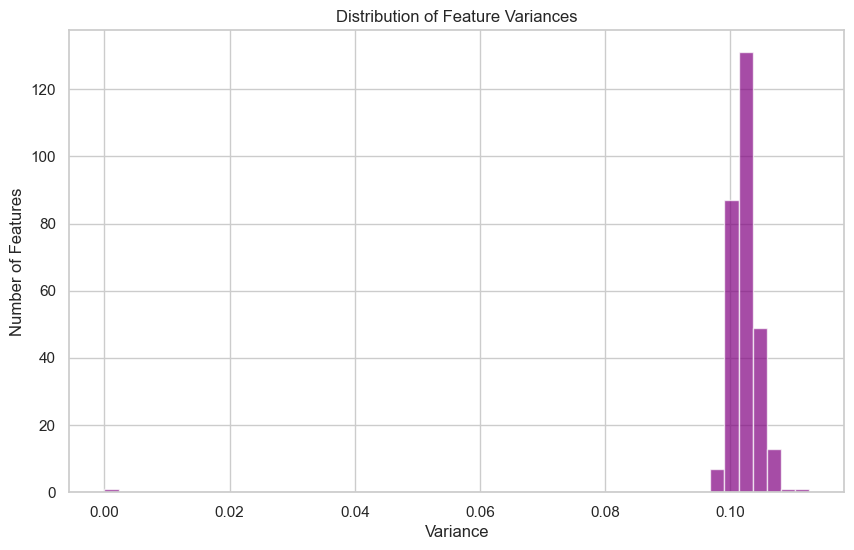

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(variances, bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Feature Variances')
plt.xlabel('Variance')
plt.ylabel('Number of Features')
plt.show()

#### Information Gain


In [62]:
info_gain = mutual_info_classif(train_feature_variable,train_target_variable)


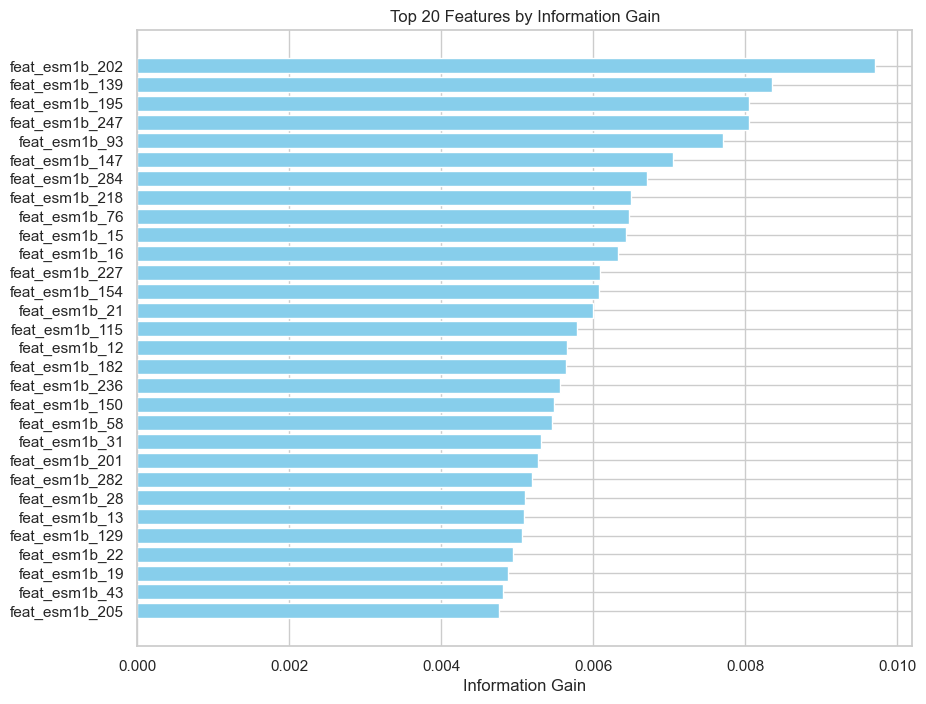

In [63]:
top_n = 30  # You can adjust this number based on what you want to visualize
sorted_indices = np.argsort(info_gain)[::-1][:top_n]
top_features = info_gain[sorted_indices]
feature_names = train_feature_variable.columns[sorted_indices]
plt.figure(figsize=(10, 8))
plt.barh(feature_names, top_features, color='skyblue')
plt.xlabel('Information Gain')
plt.title('Top 20 Features by Information Gain')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest value at the top
plt.show()

for visualisation we show only top 20 and we select top 200 for more robust feature selection using MNMR

In [64]:
top_n = 200  
sorted_indices = np.argsort(info_gain)[::-1][:top_n]
top_features = info_gain[sorted_indices]
feature_names = train_feature_variable.columns[sorted_indices]

In [65]:
feature_names

Index(['feat_esm1b_202', 'feat_esm1b_139', 'feat_esm1b_195', 'feat_esm1b_247',
       'feat_esm1b_93', 'feat_esm1b_147', 'feat_esm1b_284', 'feat_esm1b_218',
       'feat_esm1b_76', 'feat_esm1b_15',
       ...
       'feat_esm1b_246', 'feat_esm1b_24', 'feat_esm1b_54', 'feat_esm1b_143',
       'feat_esm1b_210', 'feat_esm1b_153', 'feat_esm1b_199', 'feat_esm1b_11',
       'feat_esm1b_207', 'feat_esm1b_116'],
      dtype='object', length=200)

After getting top 200 from information gain we use MNMR to get best 30 features

In [66]:
train_top_200_features = train_protein_data_imputed[feature_names]
train_top_200_features

,feat_esm1b_202,feat_esm1b_139,feat_esm1b_195,feat_esm1b_247,feat_esm1b_93,feat_esm1b_147,feat_esm1b_284,feat_esm1b_218,feat_esm1b_76,feat_esm1b_15,...,feat_esm1b_246,feat_esm1b_24,feat_esm1b_54,feat_esm1b_143,feat_esm1b_210,feat_esm1b_153,feat_esm1b_199,feat_esm1b_11,feat_esm1b_207,feat_esm1b_116
0,0.747987,0.549304,0.846698,0.562061,0.122130,0.622415,0.869542,0.636701,0.160258,1.000000,...,0.000000,0.619976,1.000000,0.356588,0.000000,0.647171,0.528489,0.384854,0.484239,0.817908
1,0.147167,0.000000,0.553606,0.387264,0.498813,1.000000,0.211624,0.556799,0.424038,1.000000,...,0.964741,0.864694,1.000000,0.000000,0.697329,0.826414,0.939723,0.166498,0.058636,0.690231
2,0.407154,1.000000,0.485417,0.403176,0.326192,0.696224,0.330336,0.410108,0.665379,0.894237,...,0.472086,0.841773,0.819855,0.574589,0.816684,0.572383,0.020000,0.000000,0.882424,0.722494
3,0.560552,0.096167,0.551670,0.114739,0.883197,0.221176,0.439419,0.718830,0.431444,0.813660,...,0.642388,0.544509,0.196749,0.163203,0.535146,0.078400,0.625687,0.549850,0.569969,0.000000
4,0.710604,0.959798,0.678359,0.534863,0.456622,0.677413,0.206724,0.824483,1.000000,0.037097,...,0.063425,0.000000,0.000000,0.172832,0.191290,1.000000,1.000000,1.000000,0.721765,0.207817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,0.301955,0.534909,0.573509,1.000000,0.071524,0.595241,0.600827,0.105895,0.254699,0.672871,...,0.566082,0.329715,0.469381,0.000000,0.313545,0.415142,0.000000,0.649716,0.745497,0.000000
12396,0.690908,0.935478,0.201631,0.234155,0.487167,0.298332,0.592100,0.761314,1.000000,0.594637,...,0.020140,0.361534,0.598146,0.757914,0.877384,0.948448,0.000000,0.196428,0.698608,0.920325
12397,1.000000,0.000000,0.720164,0.916173,0.099640,0.670739,0.582434,0.000000,0.313455,0.000000,...,0.911901,0.027746,0.695323,0.411812,0.066439,0.114066,0.155215,0.283116,0.931627,1.000000
12398,0.652265,0.566699,0.731328,0.402764,0.832967,0.563518,0.949558,0.857653,0.477595,0.840582,...,0.061561,0.418515,0.000000,0.682416,0.845068,0.613484,0.877497,0.449787,0.910316,0.546083


In [67]:
import pymrmr


selected_features_30 = pymrmr.mRMR(train_top_200_features, 'MIQ', 30) #We select 30 best features from 200 features
print("Selected features by MRMR:", selected_features_30)

Selected features by MRMR: ['feat_esm1b_247', 'feat_esm1b_251', 'feat_esm1b_94', 'feat_esm1b_179', 'feat_esm1b_66', 'feat_esm1b_198', 'feat_esm1b_104', 'feat_esm1b_116', 'feat_esm1b_166', 'feat_esm1b_215', 'feat_esm1b_231', 'feat_esm1b_19', 'feat_esm1b_127', 'feat_esm1b_158', 'feat_esm1b_58', 'feat_esm1b_270', 'feat_esm1b_205', 'feat_esm1b_218', 'feat_esm1b_115', 'feat_esm1b_22', 'feat_esm1b_276', 'feat_esm1b_278', 'feat_esm1b_138', 'feat_esm1b_164', 'feat_esm1b_120', 'feat_esm1b_31', 'feat_esm1b_264', 'feat_esm1b_244', 'feat_esm1b_271', 'feat_esm1b_72']


In [68]:
train_feature_variable_30 = train_protein_data_imputed[selected_features_30]
train_feature_variable_30


,feat_esm1b_247,feat_esm1b_251,feat_esm1b_94,feat_esm1b_179,feat_esm1b_66,feat_esm1b_198,feat_esm1b_104,feat_esm1b_116,feat_esm1b_166,feat_esm1b_215,...,feat_esm1b_276,feat_esm1b_278,feat_esm1b_138,feat_esm1b_164,feat_esm1b_120,feat_esm1b_31,feat_esm1b_264,feat_esm1b_244,feat_esm1b_271,feat_esm1b_72
0,0.562061,0.000000,0.715320,0.941961,0.905572,0.909560,0.431759,0.817908,0.834141,0.347706,...,0.279720,0.959330,1.000000,0.916427,0.688988,0.198807,0.306670,0.877604,0.456275,0.524834
1,0.387264,0.611644,0.000000,1.000000,0.000000,0.000000,0.289584,0.690231,0.178487,0.000000,...,0.789803,0.479229,0.286639,0.772841,0.000000,0.000000,0.870649,0.412213,0.000000,0.000000
2,0.403176,0.000000,0.997707,0.639054,0.528096,0.755002,0.389953,0.722494,0.522076,0.464593,...,0.605935,0.656381,0.864614,0.351033,0.760453,0.185438,0.395715,1.000000,0.937205,0.863495
3,0.114739,1.000000,0.448685,0.593272,0.565051,0.443971,0.640822,0.000000,0.130733,0.243970,...,0.866993,0.062865,0.312437,0.131103,0.385808,0.624762,0.241197,0.238781,0.000000,0.704705
4,0.534863,0.000000,0.000000,0.106437,0.816465,0.545061,1.000000,0.207817,0.713735,1.000000,...,1.000000,0.574687,0.990977,1.000000,1.000000,0.559275,0.916975,0.684929,1.000000,0.893510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,1.000000,0.864701,0.398675,0.709045,0.584380,0.882013,0.461646,0.000000,0.851606,0.805624,...,0.850591,0.042389,0.380610,1.000000,0.180640,1.000000,0.360844,0.008831,0.181748,0.506853
12396,0.234155,0.029086,0.982148,0.532824,0.655532,0.307793,0.331487,0.920325,0.935255,0.753549,...,0.159878,0.954515,0.773510,0.200877,0.833218,0.203385,0.000000,0.938662,1.000000,0.487799
12397,0.916173,0.389612,0.683481,1.000000,0.534246,1.000000,0.920399,1.000000,0.974226,0.768558,...,1.000000,0.873984,1.000000,0.460250,0.547370,0.676329,0.224370,1.000000,0.416826,1.000000
12398,0.402764,0.226362,0.707237,0.933718,0.000000,0.225524,0.131272,0.546083,0.837365,0.327514,...,0.175340,0.924411,0.818548,0.736971,0.577334,0.116508,0.246654,0.576346,0.187468,0.455033


In [69]:
extra_features = ['Info_cluster']
selected_features_30.extend(extra_features)#we add info cluster as well to form new dataframe with selected features


In [70]:
train_features_protein_30 = train_protein_data_imputed[selected_features_30]
train_features_protein_30

,feat_esm1b_247,feat_esm1b_251,feat_esm1b_94,feat_esm1b_179,feat_esm1b_66,feat_esm1b_198,feat_esm1b_104,feat_esm1b_116,feat_esm1b_166,feat_esm1b_215,...,feat_esm1b_278,feat_esm1b_138,feat_esm1b_164,feat_esm1b_120,feat_esm1b_31,feat_esm1b_264,feat_esm1b_244,feat_esm1b_271,feat_esm1b_72,Info_cluster
0,0.562061,0.000000,0.715320,0.941961,0.905572,0.909560,0.431759,0.817908,0.834141,0.347706,...,0.959330,1.000000,0.916427,0.688988,0.198807,0.306670,0.877604,0.456275,0.524834,188
1,0.387264,0.611644,0.000000,1.000000,0.000000,0.000000,0.289584,0.690231,0.178487,0.000000,...,0.479229,0.286639,0.772841,0.000000,0.000000,0.870649,0.412213,0.000000,0.000000,32
2,0.403176,0.000000,0.997707,0.639054,0.528096,0.755002,0.389953,0.722494,0.522076,0.464593,...,0.656381,0.864614,0.351033,0.760453,0.185438,0.395715,1.000000,0.937205,0.863495,64
3,0.114739,1.000000,0.448685,0.593272,0.565051,0.443971,0.640822,0.000000,0.130733,0.243970,...,0.062865,0.312437,0.131103,0.385808,0.624762,0.241197,0.238781,0.000000,0.704705,102
4,0.534863,0.000000,0.000000,0.106437,0.816465,0.545061,1.000000,0.207817,0.713735,1.000000,...,0.574687,0.990977,1.000000,1.000000,0.559275,0.916975,0.684929,1.000000,0.893510,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,1.000000,0.864701,0.398675,0.709045,0.584380,0.882013,0.461646,0.000000,0.851606,0.805624,...,0.042389,0.380610,1.000000,0.180640,1.000000,0.360844,0.008831,0.181748,0.506853,57
12396,0.234155,0.029086,0.982148,0.532824,0.655532,0.307793,0.331487,0.920325,0.935255,0.753549,...,0.954515,0.773510,0.200877,0.833218,0.203385,0.000000,0.938662,1.000000,0.487799,14
12397,0.916173,0.389612,0.683481,1.000000,0.534246,1.000000,0.920399,1.000000,0.974226,0.768558,...,0.873984,1.000000,0.460250,0.547370,0.676329,0.224370,1.000000,0.416826,1.000000,46
12398,0.402764,0.226362,0.707237,0.933718,0.000000,0.225524,0.131272,0.546083,0.837365,0.327514,...,0.924411,0.818548,0.736971,0.577334,0.116508,0.246654,0.576346,0.187468,0.455033,36


### Class Imbalance and Treatment


In [71]:
class_distribution = train_target_variable.value_counts()
class_distribution

-1    8964
 1     141
Name: Class, dtype: int64

#### Sampling 

In this section we use different types of sampling methods and choose the best

In [72]:
from imblearn.over_sampling import BorderlineSMOTE, ADASYN
from imblearn.under_sampling import  TomekLinks,CondensedNearestNeighbour

# Apply Borderline-SMOTE
smote = BorderlineSMOTE(random_state=42)
X_res, y_res = smote.fit_resample(train_features_protein_30, train_target_variable)

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_res_ada, y_res_ada = adasyn.fit_resample(train_features_protein_30, train_target_variable)

# Tomek links
tl = TomekLinks()
X_res_tom, y_res_tom = tl.fit_resample(train_features_protein_30, train_target_variable)

# Initialize the CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=42)
X_res_cnn, y_res_cnn = cnn.fit_resample(train_features_protein_30, train_target_variable)


In [73]:
print("Tomel Links :\n", y_res_tom.value_counts()) #Tomel link doesn't work still class imbalance present
print("CNN : \n", y_res_cnn.value_counts())
print("ASASYN : \n" ,y_res_ada.value_counts())
print("BorderlineSMOTE : \n", y_res.value_counts())

Tomel Links :
 -1    8940
 1     141
Name: Class, dtype: int64
CNN : 
 -1    278
 1    141
Name: Class, dtype: int64
ASASYN : 
 -1    8964
 1    8955
Name: Class, dtype: int64
BorderlineSMOTE : 
 -1    8964
 1    8964
Name: Class, dtype: int64


We use ADASYN sampled data and normal data for modelling as well

In [74]:
X= X_res_ada 
y = y_res_ada

We split the data into train and Val for parameter tuning but this time we use Group -K fold to prevent any data leakage

In [75]:
from sklearn.model_selection import GroupKFold 

groups = X['Info_cluster']  # Grouping variable
# Initializing a GroupKFold to handle group splitting
gkf = GroupKFold(n_splits=5)  # Use 5 folds

# Perform group k-fold cross-validation

for train_idx, val_idx in gkf.split(X, y, groups):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

We are gonna use sampled data  by ADASYN  for modelling and we are gonna try different models and carry on hyperparameter tuning as well to get good balanced accuracy and good F1 score


### Modelling and HyperParameter Tuning

For modelling and hyper-parameter tuning we use different classification models with different parameters and find the best parameters using grid search CV.

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV



# Models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    
}

# Hyperparameters
param_grids = {
    'LogisticRegression': {'C': [0.1, 1, 10], 'penalty': ['l2'],'class_weight' : [{-1: 1, 1: 10}]},
    'RandomForestClassifier': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    'DecisionTreeClassifier' : {'max_depth': [None,10,20]},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5]},

    }

### Evaluation

We evaluate different models based on their F1 Score, Balanced Accuracy and Accuracy

In [77]:
from sklearn.metrics import classification_report, balanced_accuracy_score
# Continue using the same evaluation function
def evaluate_model(model_name, model, params, X_train, y_train, X_test, y_test):
    clf = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Best parameters for {model_name}: {clf.best_params_}")
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print(f"Balanced Accuracy : ",balanced_accuracy_score(y_test, y_pred))

# Evaluate all models, now including XGBoost
for name, model in models.items():
    evaluate_model(name, model, param_grids[name], X_train, y_train, X_val, y_val)

c:\Users\prana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

c:\Users\prana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters for LogisticRegression: {'C': 10, 'class_weight': {-1: 1, 1: 10}, 'penalty': 'l2'}
Classification report for LogisticRegression:
              precision    recall  f1-score   support

          -1       0.75      0.61      0.67      1603
           1       0.73      0.83      0.78      1980

    accuracy                           0.73      3583
   macro avg       0.74      0.72      0.72      3583
weighted avg       0.74      0.73      0.73      3583

Balanced Accuracy :  0.7223879468420953
Best parameters for RandomForestClassifier: {'max_depth': 20, 'n_estimators': 100}
Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

          -1       0.60      1.00      0.75      1603
           1       0.99      0.47      0.64      1980

    accuracy                           0.71      3583
   macro avg       0.80      0.73      0.70      3583
weighted avg       0.82      0.71      0.69      3583

Balanced Accuracy :  0.73386

From trying various models and various Hyper-Parameters we found that Gradient - boosting performs beest with 0.85 accuracy, 0.89 F1 score and 0.81 balanced accuracy we use this in our pipeline

For our pipeline we would need a custom MRMR function as MRMR doesn't integrate with skitlearn 

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin

class MRMRSelection(BaseEstimator, TransformerMixin):
    def __init__(self, k=10):
        self.k = k  # Number of features to select

    def fit(self, X, y=None):
        # Convert array to DataFrame with column names for pymrmr compatibility
        if isinstance(X, np.ndarray):
            self.feature_names_ = ['feature_' + str(i) for i in range(X.shape[1])]
        else:
            self.feature_names_ = X.columns.tolist()
        return self

    def transform(self, X, y=None):
        if isinstance(X, np.ndarray):
            X_df = pd.DataFrame(X, columns=self.feature_names_)
        else:
            X_df = X.copy()

        # MRMR feature selection
        selected_features = pymrmr.mRMR(X_df, 'MIQ', self.k)
        # Ensure that selected features indices are used if names are returned
        selected_indices = [self.feature_names_.index(feat) for feat in selected_features]
        return X[:, selected_indices]

Below is the pipeline made form the best choices infered above and to try the holdout dataset.

In [80]:
from sklearn.pipeline import Pipeline
# Define the pipeline

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Step 1: Imputer,
    ('scaler', MinMaxScaler()),  # Step 2: Min-MaxScaler
    ('selector', MRMRSelection(k=20)),  # Step 3: MRMR for feature selection
    ('classifier', GradientBoostingClassifier(n_estimators=150,learning_rate=0.5, random_state=42))  # Step 3: Classifier
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler()), ('selector', MRMRSelection(k=20)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.5, n_estimators=150,
                                            random_state=42))])

### Final Pediction on Holdout Dataset

In [96]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Load the holdout dataset
df_holdout = pd.read_csv('df_reduced_holdout.csv', delimiter=';')

# Ensure columns and order match X_train
X_holdout = df_holdout[X_train.columns]

# Apply preprocessing steps to the holdout dataset

X_holdout_imputed = pipe.named_steps['imputer'].fit_transform(X_holdout)
X_holdout_transformed = pipe.named_steps['scaler'].fit_transform(X_holdout_imputed)

X_holdout_selected = pipe.named_steps['selector'].transform(X_holdout_transformed)

# Load the classifier from the pipeline
clf = pipe.named_steps['classifier']

# Make predictions using the classifier
y_pred_holdout = clf.predict(X_holdout_selected)

# Create a new DataFrame with the predicted 'Class' column
df_predictions = df_holdout[['Info_PepID','Info_pos']]
df_predictions['Predicted_Class'] = y_pred_holdout

# Save the dataset with the predicted 'Class' column to a CSV file
df_predictions.to_csv('df_holdout_with_predictions.csv', index=False)

# Verify the saved CSV file with predictions
print("Saved CSV file with predictions:")
print(df_predictions.head())


Saved CSV file with predictions:
     Info_PepID  Info_pos  Predicted_Class
1  CAA40511.1:2        41               -1
2  CAA40511.1:2        42               -1
3  CAA40511.1:2        43               -1
4  CAA40511.1:2        44               -1
5  CAA40511.1:2        45               -1


C:\Users\prana\AppData\Local\Temp\ipykernel_11080\1001805847.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictions['Predicted_Class'] = y_pred_holdout


In [94]:
df_predictions = df_holdout[['Info_PepID','Info_pos']]
df_predictions

,Info_PepID,Info_pos
1,CAA40511.1:2,41
2,CAA40511.1:2,42
3,CAA40511.1:2,43
4,CAA40511.1:2,44
5,CAA40511.1:2,45
...,...,...
5608,EAN90963.1:16,724
5609,EAN90963.1:16,725
5610,EAN90963.1:16,726
5611,EAN90963.1:16,727
